In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv('vlc_positioning_dataset_2.csv')
df

,X,Y,LED1,LED2,LED3,LED4
0,4.07360,3.72430,0.000088,0.000012,0.000133,0.061205
1,4.52900,4.46130,0.000029,0.000008,0.000064,0.009562
2,0.63493,1.21300,0.018080,0.000016,0.000073,0.000096
3,4.56690,0.64798,0.000162,0.000002,0.002708,0.000281
4,3.16180,1.12530,0.000622,0.000007,0.001737,0.000400
...,...,...,...,...,...,...
1995,0.12575,1.03960,0.004333,0.000012,0.000046,0.000047
1996,2.07210,0.19802,0.001693,0.000005,0.000246,0.000113
1997,3.65700,2.34680,0.000266,0.000011,0.000615,0.001607
1998,3.90690,0.75048,0.000296,0.000003,0.017587,0.000325


In [3]:
X = df[['LED1', 'LED2', 'LED3', 'LED4']]
y = df[['X', 'Y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
svr = MultiOutputRegressor(SVR())

param_grid = {
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__C': [0.1, 1, 10, 100],
    'estimator__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'estimator__epsilon': [0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(estimator=svr,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          verbose=2,
                          n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best HyperParameters: {best_params}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best HyperParameters: {'estimator__C': 100, 'estimator__epsilon': 0.5, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}


In [5]:
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=100, epsilon=0.5))

In [6]:
y_pred_svr = best_svr.predict(X_test)

mae_x_svr = mean_absolute_error(y_test['X'], y_pred_svr[:, 0])
rmse_x_svr = np.sqrt(mean_squared_error(y_test['X'], y_pred_svr[:, 0]))
r2_x_svr = r2_score(y_test['X'], y_pred_svr[:, 0])

mae_y_svr = mean_absolute_error(y_test['Y'], y_pred_svr[:, 1])
rmse_y_svr = np.sqrt(mean_squared_error(y_test['Y'], y_pred_svr[:, 1]))
r2_y_svr = r2_score(y_test['Y'], y_pred_svr[:, 1])

print(f"SVR Model - X Coordinate Metrics:")
print(f"MAE: {mae_x_svr}")
print(f"RMSE: {rmse_x_svr}")
print(f"R² Score: {r2_x_svr}")

print(f"\nSVR Model - Y Coordinate Metrics:")
print(f"MAE: {mae_y_svr}")
print(f"RMSE: {rmse_y_svr}")
print(f"R² Score: {r2_y_svr}")

SVR Model - X Coordinate Metrics:
MAE: 0.6607885329265016
RMSE: 0.8846165625370517
R² Score: 0.6109912613640514

SVR Model - Y Coordinate Metrics:
MAE: 0.6523230195267863
RMSE: 0.8839084896272038
R² Score: 0.6208670509228279


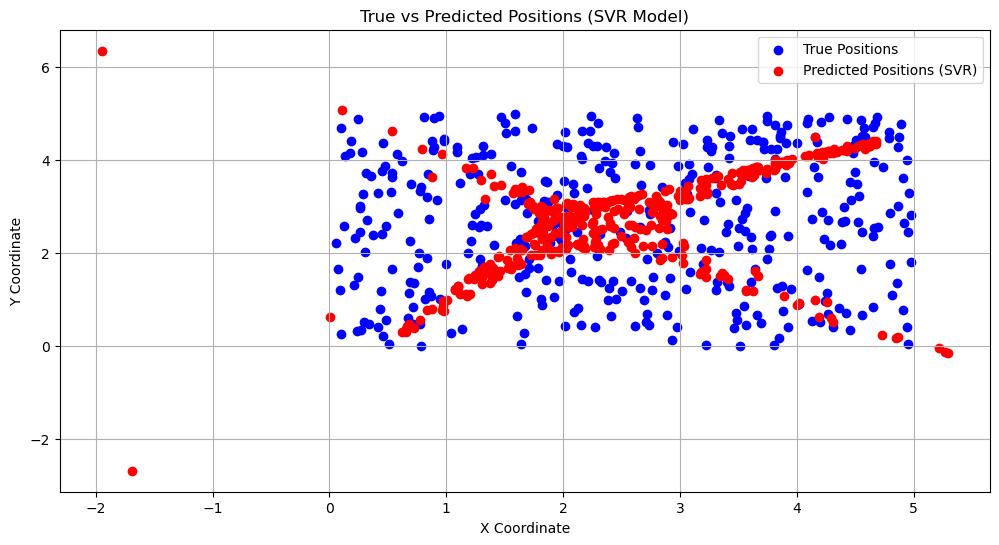

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test['X'], y_test['Y'], color='blue', label='True Positions')
plt.scatter(y_pred_svr[:, 0], y_pred_svr[:, 1], color='red', label='Predicted Positions (SVR)')
plt.title('True vs Predicted Positions (SVR Model)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show();